In [2]:
import pandas as pd

# ROBERTA testing

In [3]:
labelled_df = pd.read_csv('labelled_test_set.csv')

In [6]:
sent_conv_dict = {'pos': 'positive', 'neg': 'negative', 'neu': 'neutral'}
df_sent = labelled_df.copy()

df_sent['manual_sent'] = df_sent['manual_sent'].replace(sent_conv_dict)


In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
y_true = df_sent['manual_sent']
y_pred = df_sent['sent_roberta_tweet_class']

cm = confusion_matrix(y_true, y_pred)
print(cm)
sent_acc = accuracy_score(y_true, y_pred)
sent_precision = precision_score(y_true, y_pred, average='weighted')
sent_recall = recall_score(y_true, y_pred, average='weighted')

print(f'The average accuracy is: {round((sent_acc * 100), 2)}%, \n The weighted precision is: {round(sent_precision, 2)}, \n The weighted recall is: {round(sent_recall, 2)}')

[[ 65  23   7]
 [ 12  44  12]
 [  9  20 107]]
The average accuracy is: 72.24%, 
 The weighted precision is: 0.74, 
 The weighted recall is: 0.72


In [9]:
from sklearn.metrics import classification_report

print(classification_report(df_sent['manual_sent'], df_sent['sent_roberta_tweet_class']))

              precision    recall  f1-score   support

    negative       0.76      0.68      0.72        95
     neutral       0.51      0.65      0.57        68
    positive       0.85      0.79      0.82       136

    accuracy                           0.72       299
   macro avg       0.70      0.71      0.70       299
weighted avg       0.74      0.72      0.73       299


# Distribution of Topics in manual labels

 The percentage for food is: 9.36%
 The percentage for vlog is: 20.74%
 The percentage for health is: 2.34%
 The percentage for politics is: 7.36%
 The percentage for meme is: 3.34%
 The percentage for misc is: 20.74%
 The percentage for relationships is: 18.06%
 The percentage for art is: 5.69%
 The percentage for beauty is: 8.7%
 The percentage for self is: 3.68%


C:\Users\2mrwm\AppData\Local\Temp\ipykernel_16732\2919654548.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')


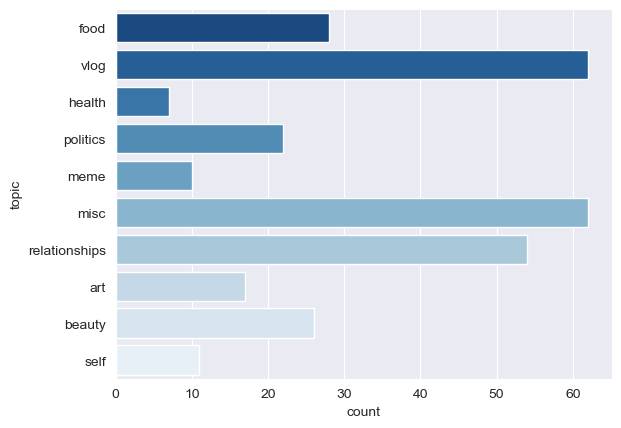

In [10]:
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import numpy as np

different_topics = labelled_df['manual_topic']
count = Counter(different_topics)

topics = [topic for topic in count]
height = [n for n in count.values()]
bar_df = pd.DataFrame()
bar_df['topic'] = topics
bar_df['count'] = height
sns.barplot(data=bar_df, x='count', y='topic', palette='Blues_r')

total_count = np.sum(np.array(height))
for t in count:
    print(f' The percentage for {t} is: {round(((count[t] / total_count) * 100), 2)}%')


Counter({'diaries_&_daily_life': 1696, 'food_&_dining': 620, 'music': 349, 'relationships': 348, 'fashion_&_style': 334, 'family': 296, 'film_tv_&_video': 275, 'fitness_&_health': 219, 'celebrity_&_pop_culture': 201, 'news_&_social_concern': 192, 'sports': 164, 'business_&_entrepreneurs': 100, 'learning_&_educational': 73, 'travel_&_adventure': 70, 'science_&_technology': 68, 'gaming': 65, 'arts_&_culture': 59, 'other_hobbies': 28, 'youth_&_student_life': 1})
 The percentage for diaries_&_daily_life is: 32.88%
 The percentage for food_&_dining is: 12.02%
 The percentage for relationships is: 6.75%
 The percentage for music is: 6.77%
 The percentage for celebrity_&_pop_culture is: 3.9%
 The percentage for film_tv_&_video is: 5.33%
 The percentage for travel_&_adventure is: 1.36%
 The percentage for sports is: 3.18%
 The percentage for family is: 5.74%
 The percentage for fitness_&_health is: 4.25%
 The percentage for business_&_entrepreneurs is: 1.94%
 The percentage for news_&_social_c

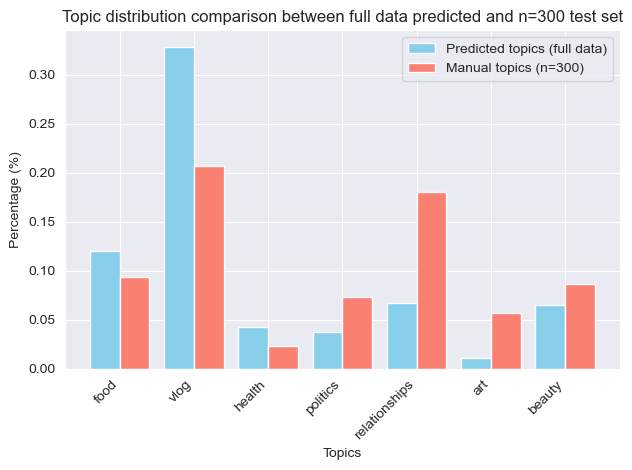

In [11]:

full_df = pd.read_csv('analyzed_csv.csv')
count_pred = Counter(full_df['top_roberta_class1'])
print(count_pred)

for perc in count_pred:
    print(f' The percentage for {perc} is: {round((count_pred[perc] / 5158) * 100, 2)}%')

manual_topics_dist = ['food', 'vlog', 'health', 'politics', 'relationships', 'art', 'beauty']
manual_topics_height = [0.0936, 0.2074, 0.0234, 0.0736, 0.1806, 0.0569, 0.087]

pred_topics_dist = ['food', 'vlog', 'health', 'politics', 'relationships', 'art', 'beauty']
pred_topics_height = [0.1202, 0.3288, 0.0425, 0.0372, 0.0675, 0.0114, 0.0648]

x = np.arange(len(manual_topics_dist))

width = 0.4
fig, ax = plt.subplots()
bar1 = ax.bar(x - width/2, pred_topics_height, width, label='Predicted topics (full data)', color='skyblue')
bar2 = ax.bar(x + width/2, manual_topics_height, width, label='Manual topics (n=300)', color='salmon')

ax.set_xlabel('Topics')
ax.set_ylabel('Percentage (%)')
ax.set_title('Topic distribution comparison between full data predicted and n=300 test set')
ax.set_xticks(x)
ax.set_xticklabels(manual_topics_dist, rotation=45, ha='right')
ax.legend()

plt.tight_layout()
plt.show()




In [12]:
df = pd.read_csv('labelled_test_set_5labels.csv')

df['manual_topic'] = df['manual_topic'].replace('meme', 'misc')
df['manual_topic'] = df['manual_topic'].replace('self', 'misc')

grouped_topics2 = {'diaries_&_daily_life': 'vlog', 'food_&_dining': 'food', 'relationships': 'relationships', 'celebrity_&_pop_culture': 'misc', 'music': 'art', 'family': 'relationships', 'fashion_&_style': 'beauty', 'film_tv_&_video': 'art', 'news_&_social_concern': 'politics', 'fitness_&_health': 'health', 'sports': 'misc', 'other_hobbies': 'misc', 'business_&_entrepreneurs': 'misc', 'travel_&_adventure': 'vlog', 'learning_&_educational': 'misc', 'arts_&_culture': 'art', 'gaming': 'art', 'science_&_technology': 'misc', 'youth_&_student_life': 'misc'}

for roberta_classes, manual_topic in grouped_topics2.items():

    df['top_roberta_class1'] = df['top_roberta_class1'].replace(roberta_classes, manual_topic)
    df['top_roberta_class2'] = df['top_roberta_class2'].replace(roberta_classes, manual_topic)
    df['top_roberta_class3'] = df['top_roberta_class3'].replace(roberta_classes, manual_topic)
    df['top_roberta_class4'] = df['top_roberta_class4'].replace(roberta_classes, manual_topic)
    df['top_roberta_class5'] = df['top_roberta_class5'].replace(roberta_classes, manual_topic)
    
print(df['top_roberta_class1'])
    
top_y_true = df['manual_topic']
top_y_pred = df['top_roberta_class1']
top_y_pred2 = df['top_roberta_class2']
top_y_pred3 = df['top_roberta_class3']
top_y_pred4 = df['top_roberta_class4']


correct_predictions = (top_y_true == top_y_pred) | (top_y_true == top_y_pred2) | (top_y_true == top_y_pred3) | (top_y_true == top_y_pred4) 
custom_accuracy = correct_predictions.mean()
print("Custom Accuracy:", custom_accuracy)




0               food
1               vlog
2             health
3                art
4               vlog
           ...      
294             misc
295              art
296              art
297              art
298    relationships
Name: top_roberta_class1, Length: 299, dtype: object
0     True
1     True
2     True
3    False
4    False
5    False
6     True
7     True
8     True
9     True
dtype: bool
Custom Accuracy: 0.7892976588628763


In [17]:
from sklearn.metrics import precision_score, recall_score, precision_recall_fscore_support

# Consolidate all top predictions into one list of lists
top_y_preds = df[['top_roberta_class1', 'top_roberta_class2']].values.tolist()

y_pred_final = [
    next((pred for pred in preds if pred == true_label), preds[0])  
    for true_label, preds in zip(df['manual_topic'], top_y_preds)
]

precision, recall, f1, _ = precision_recall_fscore_support(df['manual_topic'], y_pred_final, average='macro')

print("Custom Precision:", precision)
print("Custom Recall:", recall)
print("Custom F1 Score:", f1)

accuracy = accuracy_score(df['manual_topic'], y_pred_final)
print("Custom Accuracy:", accuracy)


report = classification_report(df['manual_topic'], y_pred_final, zero_division=0)

print("Custom Accuracy:", accuracy)
print("\nClassification Report:\n", report)



Custom Precision: 0.6856835855907967
Custom Recall: 0.6923352462741994
Custom F1 Score: 0.6598221712172134
Custom Accuracy: 0.6454849498327759
Custom Accuracy: 0.6454849498327759

Classification Report:
                precision    recall  f1-score   support

          art       0.34      0.82      0.48        17
       beauty       0.95      0.73      0.83        26
         food       0.83      0.89      0.86        28
       health       0.50      0.71      0.59         7
         misc       0.83      0.46      0.59        83
     politics       0.75      0.55      0.63        22
relationships       0.80      0.65      0.71        54
         vlog       0.49      0.73      0.58        62

     accuracy                           0.65       299
    macro avg       0.69      0.69      0.66       299
 weighted avg       0.72      0.65      0.65       299
